<a href="https://colab.research.google.com/github/MarianaSosaTerrazas/DIPLOMADO_CIENCIA_MATEMATICA_2024-1/blob/main/Data_Analyst_Assignment_1_MarianaSosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analyst Assignment

## Introduction

You are working with a US retail customer on a pilot deployment.  They are using technology to track their merchandise throughout their supply chain.  The flow of their supply is:

*   **DC 1:**  Orders are filled and palletized.
*   **Truck:** Pallets travel from the DC 1 to DC 2 via semi-truck.
*   **DC 2:**  Pallets are unloaded, and additional merchandise may be added.  They are then reloaded onto a new truck.
*   **Truck:** Pallets travel from DC 2 to the Store.
*   **Store:** Pallets are unloaded, cases are removed, and stocked, and the empty cases are left behind the building awaiting pickup.

Your job is to dig into the data and find compelling insights to show the value fo the technology and help move the contract from a pilot into a full scaled deployment.



---

## Part 0: Imports

Import necessary packages and

In [1]:
import pandas as pd

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Diplomado

/content/drive/MyDrive/Diplomado


In [5]:
df=pd.read_excel('Diplomado_Assignment_1.xlsx')

In [6]:
df

,asset_type,asset_id,tag_id,Site,Zone,device_id,time_est,lat,lng,Temperature_C,Temperature_F
0,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 11:59:26.628,47.79158,-65.68902,23.0,73.40
1,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,EC5B0499234F,2022-08-02 12:00:22.660,47.79158,-65.68902,23.0,73.40
2,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 12:01:11.234,47.79158,-65.68902,23.0,73.40
3,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,3D8B2BDB8673,2022-08-02 13:47:58.172,47.79158,-65.68902,23.5,74.30
4,tote,2,(01)00850027865010(21)0082T0670,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 11:58:55.049,47.79158,-65.68902,23.0,73.40
...,...,...,...,...,...,...,...,...,...,...,...
130056,tote,205,(01)00850027865010(21)0082T1137,Store,store_front_Store,26AB1C9A2E41,2022-08-04 12:48:51.273,47.74923,-65.64101,23.1,73.58
130057,tote,205,(01)00850027865010(21)0082T1137,Store,store_front_Store,26AB1C9A2E41,2022-08-04 12:49:58.699,47.74923,-65.64101,23.5,74.30
130058,tote,205,(01)00850027865010(21)0082T1137,Store,store_front_Store,26AB1C9A2E41,2022-08-04 12:52:45.173,47.74923,-65.64101,23.0,73.40
130059,tote,205,(01)00850027865010(21)0082T1137,Store,store_front_Store,26AB1C9A2E41,2022-08-04 12:53:48.228,47.74923,-65.64101,23.0,73.40


### Dataset Overview

* Site:  A large space that could contain multiple readers. Ex: DC 1.
* Zone:  Point of interest. These represent areas in which repeaters are installed. These can be thought of as sub-zones.  Ex: Dock Doors.
* Asset ID: The unique ID of the asset.
* Asset Type: The type of thing that is detected (ie tote).
* Device ID: The unique gateway reader ID that detected the device in the zone (there can be multiple in one zone).
* Time est: The time in EST.
* Lon: Longituge
* Lat: Latitude
* Temperature_C / F: Temperature in Celsius, Fahrentheit

## PART 1: Data Overview

### Question 1:

* How many unique cases were we tracking throughout this pilot. (1 pt)
* What are the unique zones we could see (1 pt)
* How many POI's are in each Zone. (2 pts)


In [11]:
df.describe(include='all')

<ipython-input-11-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,asset_type,asset_id,tag_id,Site,Zone,device_id,time_est,lat,lng,Temperature_C,Temperature_F
count,130061,130061.000000,130061,130061,130061,130061,130061,130061.000000,130061.000000,130061.000000,130061.000000
unique,1,NaN,34,4,15,38,129887,NaN,NaN,NaN,NaN
top,tote,NaN,(01)00850027865010(21)0082T0953,Store,receiving_Store,AC8DEAE6FD79,2022-08-05 01:04:26.437000,NaN,NaN,NaN,NaN
freq,130061,NaN,6602,96897,66099,43611,2,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-02 10:14:54.326000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-05 13:28:29.966000,NaN,NaN,NaN,NaN
mean,NaN,105.184475,NaN,NaN,NaN,NaN,NaN,47.760258,-65.668955,25.874445,78.574000
std,NaN,61.459262,NaN,NaN,NaN,NaN,NaN,0.019223,0.049597,2.795208,5.031375
min,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,47.748780,-65.762200,19.000000,66.200000
25%,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,47.749230,-65.641010,24.000000,75.200000


In [19]:
# How many unique cases were we tracking throughout this pilot. (1 pt)
df.asset_id.nunique()

18

**We tracking 18 cases**

In [23]:
# What are the unique zones we could see (1 pt)
df.Site.nunique()

4

In [24]:
df.Site.unique()

array(['DC 1', 'DC 2', 'Transit', 'Store'], dtype=object)

**We saw 4 zones, the zones is:**
1.   DC 1
2.   DC 2
3.   Transit
4.   Store

In [28]:
# How many POI's are in each Zone. (2 pts)
df.groupby(['Site']).Zone.nunique()

Site
DC 1       5
DC 2       2
Store      4
Transit    4
Name: Zone, dtype: int64

**We have between 2-5 POI's**

Site      POI's
DC 1       5
DC 2       2
Store      4
Transit    4

### Question 2:

* What is the temperature range we see?  (1pt)
* Where is temperature the highest and lowest (1pt)

In [7]:
df.describe()

,asset_id,lat,lng,Temperature_C,Temperature_F
count,130061.000000,130061.000000,130061.000000,130061.000000,130061.000000
mean,105.184475,47.760258,-65.668955,25.874445,78.574000
std,61.459262,0.019223,0.049597,2.795208,5.031375
min,2.000000,47.748780,-65.762200,19.000000,66.200000
25%,58.000000,47.749230,-65.641010,24.000000,75.200000
50%,84.000000,47.749230,-65.641010,25.000000,77.000000
75%,167.000000,47.749388,-65.641010,27.500000,81.500000
max,205.000000,47.805010,-65.640330,44.000000,111.200000


In [12]:
# What is the temperature range we see? (1pt)
df.Temperature_C.min()

19.0

In [13]:
df.Temperature_C.max()

44.0

In [14]:
df.Temperature_F.min()

66.2

In [15]:
df.Temperature_F.max()

111.2

 **Temperature_C is between 19-44 °C
Temperature_F is between 66.2-111.2 °F**

In [17]:
# Where is temperature the highest and lowest (1pt)
df.groupby(['Site']).max()

,asset_type,asset_id,tag_id,Zone,device_id,time_est,lat,lng,Temperature_C,Temperature_F
Site,,,,,,,,,,
DC 1,tote,205,(01)00850027865010(21)0082T1188,staging_DC1,F96E864E4F18,2022-08-02 14:13:28.137,47.79329,-65.68902,28.13,82.634
DC 2,tote,205,(01)00850027865010(21)0082T1136,staging_DC2,E6D3501BACAE,2022-08-04 03:46:49.908,47.79531,-65.75844,27.00,80.600
Store,tote,205,(01)00850027865010(21)0082T1188,store_front_Store,GW0CDC7EDDDEB8,2022-08-05 13:28:29.966,47.74955,-65.64033,44.00,111.200
Transit,tote,205,(01)00850027865010(21)0082T1188,PhoneKit2GW,747F99C09A08,2022-08-04 08:37:59.164,47.80501,-65.64055,34.00,93.200


In [18]:
df.groupby(['Site']).min()

,asset_type,asset_id,tag_id,Zone,device_id,time_est,lat,lng,Temperature_C,Temperature_F
Site,,,,,,,,,,
DC 1,tote,2,(01)00850027865010(21)0082T0005,Forklift1_DC1,0B2FD04933B5,2022-08-02 10:14:54.326,47.79158,-65.68981,22.5,72.5
DC 2,tote,2,(01)00850027865010(21)0082T0017,dock_doors_DC2,2B4DC74C0878,2022-08-02 23:30:22.224,47.79366,-65.75983,23.5,74.3
Store,tote,2,(01)00850027865010(21)0082T0005,point_of_sale_Store,08D0A74A7C1D,2022-08-04 08:35:16.191,47.74878,-65.64110,19.0,66.2
Transit,tote,2,(01)00850027865010(21)0082T0005,PhoneKit1Bridge,38A44056604C8F70,2022-08-02 13:45:19.896,47.74893,-65.76220,21.0,69.8


**The highest and lowest temperature was in STORE**

## Part 2: The Journey of a Case

### Question 3:

* Create a visualization that shows where a case was at over time at the zone or POI level. Imagine that this would be included in your presentation to the customer. (Non techical audience) (3 pts)

In [58]:
df[['asset_id','time_est','Site','Zone']]

,asset_id,time_est,Site,Zone
0,2,2022-08-02 11:59:26.628,DC 1,dock_doors_DC1
1,2,2022-08-02 12:00:22.660,DC 1,dock_doors_DC1
2,2,2022-08-02 12:01:11.234,DC 1,dock_doors_DC1
3,2,2022-08-02 13:47:58.172,DC 1,dock_doors_DC1
4,2,2022-08-02 11:58:55.049,DC 1,dock_doors_DC1
...,...,...,...,...
130056,205,2022-08-04 12:48:51.273,Store,store_front_Store
130057,205,2022-08-04 12:49:58.699,Store,store_front_Store
130058,205,2022-08-04 12:52:45.173,Store,store_front_Store
130059,205,2022-08-04 12:53:48.228,Store,store_front_Store


### Question 4:

* Visualize how the temperatue changes over time along its journey.  Imagine that this would be included in your presentation to the customer. (Non techical audience) (4 pts)



In [57]:
df[['asset_id','time_est','Site','Zone','Temperature_C']]

,asset_id,time_est,Site,Zone,Temperature_C
0,2,2022-08-02 11:59:26.628,DC 1,dock_doors_DC1,23.0
1,2,2022-08-02 12:00:22.660,DC 1,dock_doors_DC1,23.0
2,2,2022-08-02 12:01:11.234,DC 1,dock_doors_DC1,23.0
3,2,2022-08-02 13:47:58.172,DC 1,dock_doors_DC1,23.5
4,2,2022-08-02 11:58:55.049,DC 1,dock_doors_DC1,23.0
...,...,...,...,...,...
130056,205,2022-08-04 12:48:51.273,Store,store_front_Store,23.1
130057,205,2022-08-04 12:49:58.699,Store,store_front_Store,23.5
130058,205,2022-08-04 12:52:45.173,Store,store_front_Store,23.0
130059,205,2022-08-04 12:53:48.228,Store,store_front_Store,23.0


### Question 5:
* Visualize the lon lat data on a map to show how the case traveled.  You may incorporate any other additional information to make this more impactful. Imagine that this would be included in your presentation to the customer. (Non techical audience) (5 pts)

**Do not worry if this looks like non-sense on a map.  Ex:  The trip may appear to occur over water or in a forest because this is a toy dataset.**

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [65]:
map_aux=df[['asset_id','lat','lng']]
map_aux

,asset_id,lat,lng
0,2,47.79158,-65.68902
1,2,47.79158,-65.68902
2,2,47.79158,-65.68902
3,2,47.79158,-65.68902
4,2,47.79158,-65.68902
...,...,...,...
130056,205,47.74923,-65.64101
130057,205,47.74923,-65.64101
130058,205,47.74923,-65.64101
130059,205,47.74923,-65.64101


In [66]:
map_data=map_aux

<Axes: title={'center': 'Viaje'}, xlabel='lng', ylabel='lat'>

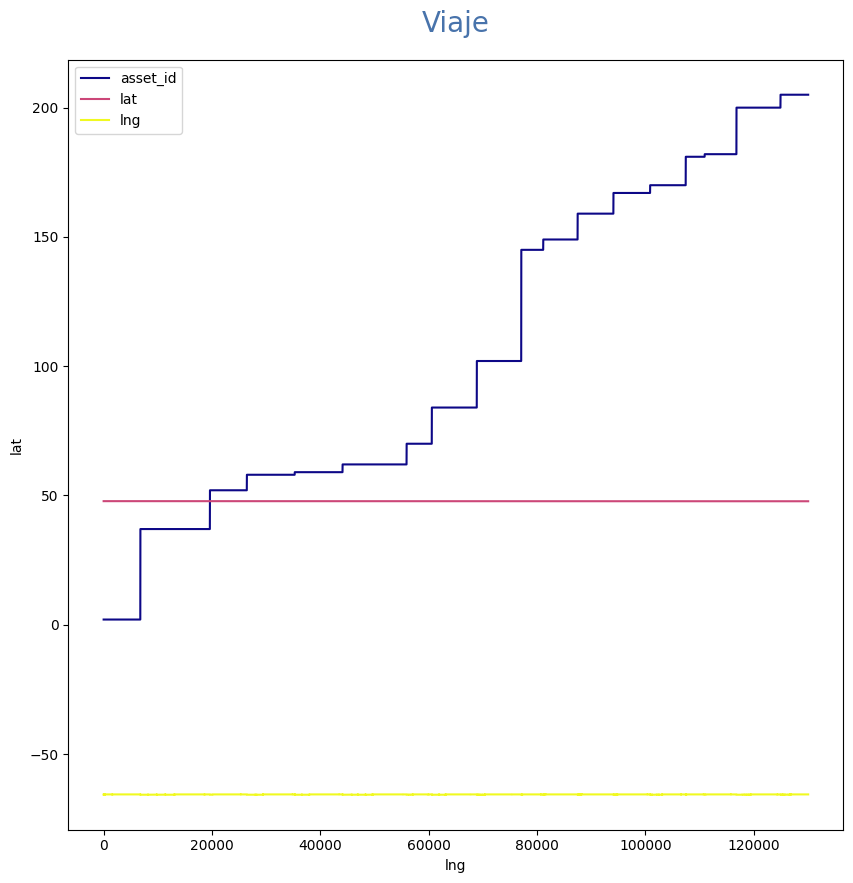

In [70]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Control del título y los ejes
ax.set_title('Viaje',
             pad = 20,
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('lng')
ax.set_ylabel('lat')

# Mostrar el mapa finalizado
map_data.plot(column='asset_id', cmap='plasma', ax=ax, zorder=5)

# Part 3: Customer Questions


### Question 6:

The customer wants to understand the efficieny of ther DC operations.
* Based on what you see in the data, (all zones except for STORE), which parts of their operation are most & least "efficient? (10 pts)

In [ ]:
# YOUR CODE HERE

YOUR TEXT ANSWER HERE

### Question 7:

The customer wants to understand the stocking efficiency in stores.
* Based on what you see in the data, how quickly did the store unload and stock the merchandise. (5 pts)
* How could this be converted in a KPI that a regional manager could track?  (5 pts)

In [ ]:
# YOUR CODE HERE

YOUR TEXT ANSWER HERE

### Question 8:

Please explain what you would ask for and what you will do with this data, given that you can talk with the following people (no code needed):


YOUR TEXT ANSWER HERE
* a. X
* b. Y

## Part 4: Bonus Insights

### Question 8

The customer is open to hearing about additional insights you found in the data above and beyond what they asked for.
* Based on what you can see in the data, are there any other interesting insights that the customer may want to hear about? (Up to 15 bonus points)



In [ ]:
# YOUR CODE HERE
# Another metrics that could be interesting would be temperature by time

YOUR TEXT ANSWER HERE
